In [1]:
import numpy as np
import pandas as pd

import geopy.distance

from sklearn import linear_model, metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import shutil
import os
import json

from utils.PreProcessor import PreProcessor

# Loading Datasets

In [2]:
%time preprocessor = PreProcessor(sample_num = 1, preprocess_all_raw_data = True)

**************************************
Converting Raw Datasets into PreProcessed Datasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
None
Opening Sample AirRouteDatasets
Opening AirRouteDatasets - Flights
Opening AirRouteDatasets - Airports
Airports which are included in routes but not in airport list are -
None
Opening City-pair wise Domestic Passengers Data
Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Book 1
Book 1
Book 1
Book 1


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will

Opening Indian Railways Data
Opening District Centroid Data
Opening Station Codes Data
Opening Indian Railways Data
0 Trains Scanned out of 5208!
500 Trains Scanned out of 5208!
1000 Trains Scanned out of 5208!
1500 Trains Scanned out of 5208!
2000 Trains Scanned out of 5208!
2500 Trains Scanned out of 5208!
3000 Trains Scanned out of 5208!
3500 Trains Scanned out of 5208!
4000 Trains Scanned out of 5208!
4500 Trains Scanned out of 5208!
5000 Trains Scanned out of 5208!
Opening Economic Data
Opening Population, Area & Household Data
Opening Population Trend Data
A-2
A-2 
A-2
A-2
A-2 
A-2 
A-2
 A-2
A-2
A-2
A-2 
A-2
 A-2
A-2 
A-2 
A-2 
A-2
A-2
 A-2
A-2
A-2 
A-2 
Opening Latest Population Data
Opening Education Data
Opening Monument Visitors Data - Visitors Data
Opening Monument Visitors Data - Tourist Location Coordinates
**************************************
**************************************
Loading PreProcessed Datasets
Loaded AirRouteDatasets
Loaded Domestic Passenger Data
Loade

In [3]:
# %time preprocessor = PreProcessor(sample_num = 1, preprocess_all_raw_data = False)

# Checking Data

## Air Route Data

In [4]:
preprocessor.city_mapping.head()

,City,AirRouteData_AirportCode,DomesticPassengerTraffic_City,EconomicData_District,StationCodeData_District,Airport_City_Coords,EducationData_District,PopulationAreaHousehold_District,LatestPopulation_City,PopulationHistory_District
0,Ahmedabad,AMD,AHMEDABAD,NaN,Ahmadabad,"23.073702560470423, 72.62711816841471",AHMADABAD,Ahmadabad,Ahmedabad,ahmadabad
1,Bengaluru,BLR,BENGALURU,{BANGALORE URBAN + BANGALORE RURAL},Bangalore Urban,"13.199253589160458, 77.70610499457639",{BANGALORE + BANGALORE RURAL},{Bangalore + Bangalore Rural},Bengaluru,{bangalore + bangalore rural}
2,Mumbai,BOM,MUMBAI,MUMBAI,Greater Bombay,"19.099282513860523, 72.87502185672862",{MUMBAI + MUMBAI SUBURBAN},{Mumbai Suburban + Mumbai},{Mumbai + Navi Mumbai},{mumbai suburban + mumbai}
3,Pune,PNQ,PUNE,PUNE,Pune,"18.57956672029852, 73.90948542603986",PUNE,Pune,Pune,pune
4,Chennai,MAA,CHENNAI,CHENNAI,Chennai,"12.994341981037747, 80.17159635853399",CHENNAI,Chennai,Chennai,chennai


## Domestic Traffic Data

In [5]:
preprocessor.total_domestic_data.head()

,Route,FROM,TO,PASSENGERS,FREIGHT,MAIL,DAYS
0,AGARTALA-AHMEDABAD,AGARTALA,AHMEDABAD,3038.0,52.357,0.0,365
1,AGARTALA-AIZAWL,AGARTALA,AIZAWL,5780.0,0.087,0.0,365
2,AGARTALA-BENGALURU,AGARTALA,BENGALURU,44195.0,367.947,0.0,365
3,AGARTALA-BHUBANESWAR,AGARTALA,BHUBANESWAR,18.0,0.000,0.0,61
4,AGARTALA-CHENNAI,AGARTALA,CHENNAI,12767.0,0.000,0.0,304


## Economic Data

In [6]:
preprocessor.economic_data.head()

,State,District,Year,GDP
0,AndhraPradesh,ADILABAD,1999-00,3463.28
1,AndhraPradesh,ADILABAD,2000-01,3742.69
2,AndhraPradesh,ADILABAD,2001-02,4209.40
3,AndhraPradesh,ADILABAD,2002-03,4099.29
4,AndhraPradesh,ADILABAD,2003-04,4781.85


## Population/Household/Area Data

In [7]:
preprocessor.pop_area_household_data.head()

,IsDistrict,District,IsTotal,InhabitedVillages,UninhabitedVillages,Towns,Households,Population,MalePopulation,FemalePopulation,Area,PopulationPerSqKm
0,DISTRICT,Kupwara,Total,353.0,9.0,10.0,113929.0,870354.0,474190.0,396164.0,2379.0,366.0
1,DISTRICT,Badgam,Total,462.0,12.0,9.0,103363.0,753745.0,398041.0,355704.0,1361.0,554.0
2,DISTRICT,Leh(Ladakh),Total,111.0,1.0,3.0,21909.0,133487.0,78971.0,54516.0,45110.0,3.0
3,DISTRICT,Kargil,Total,125.0,2.0,1.0,18338.0,140802.0,77785.0,63017.0,14036.0,10.0
4,DISTRICT,Punch,Total,170.0,8.0,3.0,90261.0,476835.0,251899.0,224936.0,1674.0,285.0


In [8]:
preprocessor.latest_population_data.head()

,city,pop2023,latitude,longitude
0,Mumbai,12691836,19.0728,72.8826
1,Delhi,10927986,28.6520,77.2315
2,Bengaluru,8443675,12.9719,77.5937
3,Hyderabad,6809970,17.3841,78.4564
4,Ahmedabad,6357693,23.0258,72.5873


In [9]:
preprocessor.population_history_data['ambala']

{'state': 'haryana',
 'history': {'1901': [330735, 183117, 147618],
  '1911': [277417, 158247, 119170],
  '1921': [258229, 145369, 112860],
  '1931': [297802, 166867, 130935],
  '1941': [339882, 189129, 150753],
  '1951': [365383, 202179, 163204],
  '1961': [453581, 248197, 205384],
  '1971': [539297, 286542, 252755],
  '1981': [659385, 346763, 312622],
  '1991': [806482, 423721, 382761],
  '2001': [1014411, 542977, 471434],
  '2011': [1128350, 598703, 529647]}}

## Education Data

In [10]:
preprocessor.education_data.head()

,20-24_TotalPopulation,20-24_TotalMalePopulation,20-24_TotalFemalePopulation,20-24_Graduates,20-24_MaleGraduates,20-24_FemaleGraduates,25-29_TotalPopulation,25-29_TotalMalePopulation,25-29_TotalFemalePopulation,25-29_Graduates,...,35-59_FemaleGraduates,60+_TotalPopulation,60+_TotalMalePopulation,60+_TotalFemalePopulation,60+_Graduates,60+_MaleGraduates,60+_FemaleGraduates,District,State,Year
0,34369,18906,15463,2244,1055,1189,32447,17129,15318,3397,...,1564,14947,8525,6422,227,183,44,ANDAMANS,ANDAMAN NICOBAR ISLANDS,2001
1,3921,2050,1871,75,34,41,4304,2254,2050,316,...,45,2419,1309,1110,6,6,0,NICOBARS,ANDAMAN NICOBAR ISLANDS,2001
2,3544,2143,1401,125,74,51,3980,2375,1605,345,...,68,2650,1447,1203,12,12,0,NICOBARS,ANDAMAN NICOBAR ISLANDS,2011
3,9386,4504,4882,416,186,230,10688,5435,5253,799,...,594,9017,5039,3978,60,54,6,NORTH MIDDLE ANDAMAN,ANDAMAN NICOBAR ISLANDS,2011
4,24185,12881,11304,2796,1228,1568,27054,14420,12634,4255,...,3265,13757,7703,6054,472,370,102,SOUTH ANDAMAN,ANDAMAN NICOBAR ISLANDS,2011


## Tourism Data

In [11]:
preprocessor.monument_visitors_data.head()

,City,NumMonuments2020,NumMonuments2022,Domestic2019-20,Domestic2020-21,Domestic2021-22,Foreign2019-20,Foreign2020-21,Foreign2021-22,Domestic2018-19,Foreign2018-19
0,Agra,9.0,9.0,7632914.0,2061695.0,5209587.0,1394635.0,14099.0,60086.0,9525738.0,1826587.0
1,Aurangabad,6.0,6.0,3545221.0,555097.0,1293929.0,56402.0,409.0,2673.0,3764094.0,73773.0
2,Bangalore,4.0,4.0,1420289.0,336796.0,529404.0,34483.0,1069.0,3348.0,1566190.0,41835.0
3,Bhopal,14.0,11.0,1953517.0,634016.0,1271045.0,61743.0,496.0,853.0,2033017.0,105201.0
4,Bhubaneswar,6.0,5.0,2404593.0,651825.0,824707.0,9249.0,230.0,777.0,2648793.0,7945.0


In [12]:
preprocessor.tourist_loc_coords_data.head()

,City,Latitude,Longitude
0,Agra,27.179822,78.010567
1,Aurangabad,19.880102,75.343481
2,Bangalore,12.980725,77.589045
3,Bhopal,23.265015,77.411382
4,Bhubaneswar,20.296040,85.828691


# Fetching Data for Tier-I/II Cities

In [13]:
tier_1_2_cities = preprocessor.city_mapping['City'].values
print(len(tier_1_2_cities))
print(tier_1_2_cities)

22
['Ahmedabad' 'Bengaluru' 'Mumbai' 'Pune' 'Chennai' 'Hyderabad' 'Kolkata'
 'Delhi' 'Visakhapatnam' 'Guwahati' 'Patna' 'Raipur' 'Gurugram' 'Shimla'
 'Jamshedpur' 'Thiruvananthapuram' 'Bhopal' 'Bhubaneswar' 'Amritsar'
 'Jaipur' 'Lucknow' 'Dehradun']


## Economic Data Features

In [14]:
def get_economic_data(cities):
    city_to_district_economic_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EconomicData_District']))
    cities_latest_gdps = []
    cities_gdp_history = []
    cities_latest_years = []
    for city in cities:
        district = city_to_district_economic_data_mapping[city]
        if(pd.isnull(district)):
            cities_latest_gdps.append(np.nan)
            cities_gdp_history.append([])
            cities_latest_years.append(np.nan)
        else:
            if(district.startswith('{')):
                districts = district[1:-1]
                districts = districts.split(' + ')
                has_district = pd.Series([False] * preprocessor.economic_data.shape[0])
                for district in districts:
                    has_district = has_district | (preprocessor.economic_data['District'] == district)
                city_economic_data = preprocessor.economic_data[has_district]
                city_economic_data = city_economic_data.groupby(['Year'])[['GDP']].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                city_economic_data['State'] = pd.Series([''] * city_economic_data.shape[0])
                city_economic_data['District'] = pd.Series([''] * city_economic_data.shape[0])
            else:
                city_economic_data = preprocessor.economic_data[preprocessor.economic_data['District'] == district]
            city_economic_data = city_economic_data.sort_values("Year").reset_index(drop = True)
            city_economic_data['Year'] = city_economic_data['Year'].apply(lambda x: int(x.split('-')[0]))
            if(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'] - city_economic_data.iloc[0]['Year'] != city_economic_data.shape[0] + 1):
                start_year = city_economic_data.iloc[0]['Year']; last_year = city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year']
                for year in range(start_year + 1, last_year):
                    if(year not in [*city_economic_data['Year'].values]):
                        to_add_row = city_economic_data.iloc[0]
                        to_add_row['Year'] = year
                        to_add_row['GDP'] = np.nan
                        to_add_row = pd.DataFrame([to_add_row], columns = city_economic_data.columns)
                        city_economic_data = pd.concat([city_economic_data, to_add_row], axis = 0).reset_index(drop = True)
            city_economic_data = city_economic_data.sort_values("Year").reset_index(drop = True)
            assert(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'] - city_economic_data.iloc[0]['Year'] == city_economic_data.shape[0] - 1)
            city_latest_gdp = city_economic_data.iloc[city_economic_data.shape[0] - 1]['GDP']
            city_latest_year = int(city_economic_data.iloc[city_economic_data.shape[0] - 1]['Year'])
            cities_latest_gdps.append(city_latest_gdp)
            city_gdp_history = city_economic_data['GDP'].values
            cities_gdp_history.append(city_gdp_history)
            cities_latest_years.append(city_latest_year)
    economic_data = pd.DataFrame([cities, cities_latest_gdps, cities_gdp_history, cities_latest_years], index = ['City', 'GDP_economic_latest', 'GDP_economic_1y_history', 'GDP_economic_1y_latestyear']).transpose().reset_index(drop = True)
    for col in economic_data.columns[1:-2]:
        economic_data[col] = economic_data[col].fillna(np.nanmean(economic_data[col].values))
    return economic_data

economic_data = get_economic_data(tier_1_2_cities)
# print(pd.isnull(economic_data).sum())
# print(economic_data.info())
economic_data.head()

/tmp/ipykernel_92255/1285609501.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['Year'] = year
/tmp/ipykernel_92255/1285609501.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['GDP'] = np.nan
/tmp/ipykernel_92255/1285609501.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_add_row['Year'] = year
/tmp/ipykernel_92255/1285609501.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,City,GDP_economic_latest,GDP_economic_1y_history,GDP_economic_1y_latestyear
0,Ahmedabad,31983.970872,[],NaN
1,Bengaluru,94112.000000,"[25139.5, 25586.379999999997, 30327.41, 32104....",2010
2,Mumbai,191910.000000,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",2012
3,Pune,93562.000000,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",2012
4,Chennai,16670.560000,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",2006


## Tourism Data Features

In [15]:
def get_tourism_data(cities):
    
    def distance_factor(miles):
        return np.exp(miles / (-200))
    
    def closest_node(node, nodes):
        dist = np.sum((nodes - node)**2, axis=1)
        return np.argmin(dist)
    
    all_cities_coords = preprocessor.city_mapping['Airport_City_Coords']
    all_cities_coords_lat = all_cities_coords.apply(lambda x: float(x.split(',')[0])).values
    all_cities_coords_lon = all_cities_coords.apply(lambda x: float(x.split(',')[1])).values
    all_cities_coords = np.asarray(list(zip(all_cities_coords_lat, all_cities_coords_lon)))
    
    all_cities_tourism_dict = {}
    for city in cities:
        all_cities_tourism_dict[city] = np.zeros(preprocessor.monument_visitors_data.shape[1] - 1, dtype = 'float')
    
    for idx, row in preprocessor.tourist_loc_coords_data.iterrows():
        tourist_loc_coord = np.asarray([row['Latitude'], row['Longitude']])
        closest_idx = closest_node(tourist_loc_coord, all_cities_coords)
        closest_city = cities[closest_idx]
        closest_coord = all_cities_coords[closest_idx]
        closest_dist = geopy.distance.geodesic(tourist_loc_coord, closest_coord).miles
        factor = distance_factor(closest_dist)
        tourism_data = preprocessor.monument_visitors_data.loc[idx].values
        if(closest_city in all_cities_tourism_dict):
            all_cities_tourism_dict[closest_city] += np.asarray(tourism_data[1:] * factor, dtype = 'float64')
        else:
            all_cities_tourism_dict[closest_city] = np.asarray(tourism_data[1:] * factor, dtype = 'float64')
    tourism_data = pd.DataFrame.from_dict(all_cities_tourism_dict, orient = 'index', columns = preprocessor.monument_visitors_data.columns[1:]).reset_index(drop = False).rename({'index': 'City'}, axis = 1)
    tourism_data['Domestic_tourism_1y_history'] = tourism_data.apply(lambda x: [x['Domestic2018-19'], x['Domestic2019-20'], x['Domestic2020-21'], x['Domestic2021-22']], axis = 1)
    tourism_data['Domestic_tourism_1y_latestyear'] = pd.Series([2021] * tourism_data.shape[0])
    tourism_data['Foreign_tourism_1y_history'] = tourism_data.apply(lambda x: [x['Foreign2018-19'], x['Foreign2019-20'], x['Foreign2020-21'], x['Foreign2021-22']], axis = 1)
    tourism_data['Foreign_tourism_1y_latestyear'] = pd.Series([2021] * tourism_data.shape[0])
    tourism_data.drop(['Domestic2018-19', 'Domestic2019-20', 'Domestic2020-21', 'Foreign2018-19', 'Foreign2019-20', 'Foreign2020-21', 'NumMonuments2020'], axis = 1, inplace = True)
    tourism_data = tourism_data.rename({'Domestic2021-22': 'Domestic_tourism_latest', 'Foreign2021-22': 'Foreign_tourism_latest', 'NumMonuments2022': 'NumMonuments_tourism_latest'}, axis = 1)
    return tourism_data
    
tourism_data = get_tourism_data(tier_1_2_cities)
# print(pd.isnull(tourism_data).sum())
# print(tourism_data.info())
tourism_data.head()

,City,NumMonuments_tourism_latest,Domestic_tourism_latest,Foreign_tourism_latest,Domestic_tourism_1y_history,Domestic_tourism_1y_latestyear,Foreign_tourism_1y_history,Foreign_tourism_1y_latestyear
0,Ahmedabad,4.497647,6.176451e+05,1034.766839,"[529858.8589545916, 775649.5177170208, 231038....",2021,"[8342.230808826265, 13514.593600339784, 395.94...",2021
1,Bengaluru,7.399579,7.634647e+05,15870.326209,"[1899249.0744411645, 1694442.7347260679, 48000...",2021,"[87796.23071819407, 67012.54615905805, 2056.04...",2021
2,Mumbai,12.949500,1.717863e+06,3050.105405,"[3866004.616992362, 3925831.308910557, 713578....",2021,"[77525.67063951552, 73085.98422793717, 512.999...",2021
3,Pune,5.419323,1.241964e+06,2055.277359,"[2638435.233867787, 2726149.953568459, 652926....",2021,"[45222.65569886421, 38111.23237784556, 465.037...",2021
4,Chennai,2.866246,1.349007e+06,172974.102173,"[1324372.679207271, 1753773.5359318813, 947255...",2021,"[102847.58114857439, 60108.03712876588, 30845....",2021


## Education Data Features

In [16]:
def get_education_data(cities):
    city_to_district_education_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['EducationData_District']))
    cities_education_data = []
    for city in cities:
        city_to_district_map = city_to_district_education_data_mapping[city]
        district_education_history = np.zeros((preprocessor.education_data.shape[1] - 3, 3))
        if(city_to_district_map.startswith('{')):
            city_to_district_map = city_to_district_map[1:-1]
            districts_years = []
            if('1991' in city_to_district_map):
                dict_entries = city_to_district_map.split('\n')
                for entry in dict_entries:
                    year = int(entry.split(': ')[0])
                    entry = ': '.join(entry.split(': ')[1:])
                    if('State' in entry):
                        district = ""
                        state = entry.split('State: ')[1]
                    else:
                        district = entry
                        state = ""
                    districts_years.append([district, year, state])
            else:
                if('+' in city_to_district_map):
                    districts = city_to_district_map.split(' + ')
                    for district in districts:
                        districts_years.extend([(district, 1991, ''), (district, 2001, ''), (district, 2011, '')])
        else:
            district = city_to_district_map
            districts_years = [(district, 1991, ''), (district, 2001, ''), (district, 2011, '')]
        history = []
        years = [1991, 2001, 2011]
        for year_idx, (district, year, state) in enumerate(districts_years):
            if(state == ''):
                district_education_data = preprocessor.education_data[preprocessor.education_data['District'] == district]
            else:
                district_education_data = preprocessor.education_data[preprocessor.education_data['State'] == state]
                district_education_data = district_education_data.groupby('Year')[district_education_data.columns[:-3]].aggregate('sum').reset_index(drop = False).rename({'index': 'Year'})
                district_education_data['State'] = pd.Series([state] * district_education_data.shape[0])
                district_education_data['District'] = pd.Series([''] * district_education_data.shape[0])
                district_education_data = district_education_data[[*district_education_data.columns[1:]] + [district_education_data.columns[0]]]
            yearly_district_education_data = district_education_data[district_education_data['Year'] == year]
            if(yearly_district_education_data.shape[0] == 0):
                district_education_history[:, years.index(year)] = np.nan
                continue
            assert(yearly_district_education_data.shape[0] == 1)
            for col_idx, col in enumerate(yearly_district_education_data.columns[:-3]):
                district_education_history[col_idx, years.index(year)] += yearly_district_education_data.iloc[0][col]
        district_education_latestyear = [2011] * district_education_history.shape[0]
        district_education_history = [*district_education_history]
        district_education_data = [city, *[x[2] for x in district_education_history]]
        cities_education_data.append(district_education_data + district_education_history + district_education_latestyear)
    cities_education_data = pd.DataFrame(cities_education_data, columns = ['City'] + [x + "_education_latest" for x in preprocessor.education_data.columns[:-3]] + [x + '_education_10y_history' for x in preprocessor.education_data.columns[:-3]] + [x + '_education_10y_latestyear' for x in preprocessor.education_data.columns[:-3]])
    return cities_education_data

education_data = get_education_data(tier_1_2_cities)
# print(pd.isnull(education_data).sum().sum())
# print(education_data.info())
education_data.head()

,City,20-24_TotalPopulation_education_latest,20-24_TotalMalePopulation_education_latest,20-24_TotalFemalePopulation_education_latest,20-24_Graduates_education_latest,20-24_MaleGraduates_education_latest,20-24_FemaleGraduates_education_latest,25-29_TotalPopulation_education_latest,25-29_TotalMalePopulation_education_latest,25-29_TotalFemalePopulation_education_latest,...,35-59_TotalFemalePopulation_education_10y_latestyear,35-59_Graduates_education_10y_latestyear,35-59_MaleGraduates_education_10y_latestyear,35-59_FemaleGraduates_education_10y_latestyear,60+_TotalPopulation_education_10y_latestyear,60+_TotalMalePopulation_education_10y_latestyear,60+_TotalFemalePopulation_education_10y_latestyear,60+_Graduates_education_10y_latestyear,60+_MaleGraduates_education_10y_latestyear,60+_FemaleGraduates_education_10y_latestyear
0,Ahmedabad,710749.0,369470.0,341279.0,120972.0,63404.0,57568.0,677015.0,348185.0,328830.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
1,Bengaluru,1199120.0,621561.0,577559.0,271336.0,138660.0,132676.0,1298490.0,666773.0,631717.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
2,Mumbai,1333546.0,761998.0,571548.0,266058.0,133667.0,132391.0,1310338.0,728325.0,582013.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
3,Pune,1028019.0,537628.0,490391.0,198440.0,99902.0,98538.0,998018.0,521114.0,476904.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
4,Chennai,432978.0,210171.0,222807.0,143337.0,68490.0,74847.0,474939.0,229283.0,245656.0,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011


## Population/Household/Area Data Features

In [17]:
def get_population_household_area_data(cities):
    city_to_district_pop_area_household_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationAreaHousehold_District']))
    pop_area_household_data = pd.DataFrame()
    for city in cities:
        district = city_to_district_pop_area_household_data_mapping[city]
        if(district.startswith('{')):
            districts = district[1:-1].split(' + ')
            has_district = pd.Series([False] * preprocessor.pop_area_household_data.shape[0])
            for district in districts:
                has_district = has_district | (preprocessor.pop_area_household_data['District'] == district)
            district_data = preprocessor.pop_area_household_data[has_district]
            district_data = district_data.drop(['IsDistrict', 'District', 'IsTotal'], axis = 1)
            district_data = pd.DataFrame([district_data.sum(axis = 0)], columns = district_data.columns)
            district_data['IsDistrict'] = pd.Series(['DISTRICT'] * district_data.shape[0])
            district_data['District'] = pd.Series([''] * district_data.shape[0])
            district_data['IsTotal'] = pd.Series(['Total'] * district_data.shape[0])
            district_data = district_data[[*district_data.columns[-3:]] + [*district_data.columns[:-3]]]
        else:
            district_data = preprocessor.pop_area_household_data[preprocessor.pop_area_household_data['District'] == district]
        assert(district_data.shape[0] == 1)
        district_data = pd.DataFrame(district_data.values[:, 3:], columns = [x + '_population_latest' for x in district_data.columns[3:]])
        district_data['City'] = pd.Series([city])
        pop_area_household_data = pd.concat([pop_area_household_data, district_data], axis = 0)
    pop_area_household_data = pop_area_household_data[[*pop_area_household_data.columns[-1:]] + [*pop_area_household_data.columns[:-1]]]
    pop_area_household_data['PopulationPerSqKm_population_latest'] = pop_area_household_data['Population_population_latest'] / pop_area_household_data['Area_population_latest']
    return pop_area_household_data

pop_household_area_data = get_population_household_area_data(tier_1_2_cities)
# print(pd.isnull(pop_household_area_data).sum())
# print(pop_household_area_data.info())
pop_household_area_data.head()

,City,InhabitedVillages_population_latest,UninhabitedVillages_population_latest,Towns_population_latest,Households_population_latest,Population_population_latest,MalePopulation_population_latest,FemalePopulation_population_latest,Area_population_latest,PopulationPerSqKm_population_latest
0,Ahmedabad,506.0,6.0,13.0,1510134.0,7214225.0,3788051.0,3426174.0,8107.0,889.876033
0,Bengaluru,1519.0,120.0,23.0,2623124.0,10612474.0,5531833.0,5080641.0,4494.0,2361.47619
0,Mumbai,0.0,0.0,1.0,2779943.0,12442373.0,6715931.0,5726442.0,603.0,20634.117745
0,Pune,1852.0,25.0,35.0,2151503.0,9429408.0,4924105.0,4505303.0,15643.0,602.787701
0,Chennai,0.0,0.0,1.0,1154982.0,4646732.0,2335844.0,2310888.0,175.0,26552.754286


In [18]:
def get_latest_population_data(cities):
    city_to_city_latest_population_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['LatestPopulation_City']))
    latest_population_data = pd.DataFrame()
    for city in cities:
        mapped_city = city_to_city_latest_population_data_mapping[city]
        if(mapped_city.startswith('{')):
            mapped_cities = mapped_city[1:-1].split(' + ')
            has_city = pd.Series([False] * preprocessor.latest_population_data.shape[0])
            for mapped_city in mapped_cities:
                has_city = has_city | (preprocessor.latest_population_data['city'] == mapped_city)
            city_data = preprocessor.latest_population_data[has_city]
            city_data = city_data.drop(['latitude', 'longitude', 'city'], axis = 1)
            city_data = pd.DataFrame([city_data.sum(axis = 0)], columns = city_data.columns)
            city_data['City'] = pd.Series([''] * city_data.shape[0])
            city_data = city_data[[*city_data.columns[-1:]] + [*city_data.columns[:-1]]]
        else:
            city_data = preprocessor.latest_population_data[preprocessor.latest_population_data['city'] == mapped_city]
            city_data = city_data.drop(['latitude', 'longitude'], axis = 1)
        assert(city_data.shape[0] == 1)
        city_data = pd.DataFrame(city_data.values[:, 1:], columns = [x + '_population_latest' for x in city_data.columns[1:]])
        city_data['City'] = pd.Series([city])
        latest_population_data = pd.concat([latest_population_data, city_data], axis = 0)
    latest_population_data = latest_population_data[[*latest_population_data.columns[-1:]] + [*latest_population_data.columns[:-1]]]
    return latest_population_data

latest_population_data = get_latest_population_data(tier_1_2_cities)
# print(pd.isnull(latest_population_data).sum())
# print(latest_population_data.info())
latest_population_data.head()

,City,pop2023_population_latest
0,Ahmedabad,6357693
0,Bengaluru,8443675
0,Mumbai,15291836
0,Pune,3124458
0,Chennai,4681087


In [19]:
def get_population_history_data(cities):
    city_to_district_pop_history_data_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['PopulationHistory_District']))
    pop_history_data = pd.DataFrame()
    population_history_data = preprocessor.population_history_data.copy()
    for city in cities:
        district = city_to_district_pop_history_data_mapping[city]
        district_population_history_data = np.zeros((3, 12))
        if(district.startswith('{')):
            districts = district[1:-1].split(' + ')
            district_data = population_history_data[districts[0]]['history']
            for district in districts[1:]:
                next_district_data = preprocessor.population_history_data[district]['history']
                for year in np.arange(1901, 2012, 10):
                    if((str(int(year)) not in district_data) & (str(int(year)) in next_district_data)):
                        district_data[str(int(year))] = next_district_data[str(int(year))]
                    elif((str(int(year)) in district_data) & (str(int(year)) in next_district_data)):
                        for pop_type_idx in range(3):
                            district_data[str(int(year))][pop_type_idx] = district_data[str(int(year))][pop_type_idx] + next_district_data[str(int(year))][pop_type_idx]
        else:
            district_data = population_history_data[district]['history']
        for year_idx, year in enumerate(np.arange(1901, 2012, 10)):
            if(str(int(year)) in district_data):
                for pop_type_idx in range(3):
                    if((type(district_data[str(int(year))][pop_type_idx]) == str)):
                        if((district_data[str(int(year))][pop_type_idx].strip().startswith('N')) | (district_data[str(int(year))][pop_type_idx].strip().startswith('-'))):
                            district_population_history_data[pop_type_idx, year_idx] = np.nan
                        else:
                            print("ALERT!")
                            print(district_data[str(int(year))][pop_type_idx])
                    else:
                        district_population_history_data[pop_type_idx, year_idx] = district_data[str(int(year))][pop_type_idx]
            else:
                district_population_history_data[:, year_idx] = [np.nan] * 3
        district_population_history_data = pd.DataFrame([[list(x) for x in district_population_history_data]], columns = ['Population_population_10y_history', 'MalePopulation_population_10y_history', 'FemalePopulation_population_10y_history'])
        district_population_history_data['City'] = pd.Series([city])
        pop_history_data = pd.concat([pop_history_data, district_population_history_data], axis = 0)
    pop_history_data = pop_history_data[[*pop_history_data.columns[-1:]] + [*pop_history_data.columns[:-1]]]
    pop_history_data['Population_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    pop_history_data['MalePopulation_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    pop_history_data['FemalePopulation_population_10y_latestyear'] = pd.Series([2011] * pop_history_data.shape[0])
    return pop_history_data

pop_history_data = get_population_history_data(tier_1_2_cities)
# print(pd.isnull(pop_history_data).sum())
# print(pop_history_data.info())
pop_history_data.head()

,City,Population_population_10y_history,MalePopulation_population_10y_history,FemalePopulation_population_10y_history,Population_population_10y_latestyear,MalePopulation_population_10y_latestyear,FemalePopulation_population_10y_latestyear
0,Ahmedabad,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",2011,2011,2011
0,Bengaluru,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",2011,2011,2011
0,Mumbai,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",2011,2011,2011
0,Pune,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",2011,2011,2011
0,Chennai,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",2011,2011,2011


## Airport Traffic Data Features

In [20]:
def get_airport_in_out_passenger_traffic_data(cities):
    city_to_city_mapping = dict(zip(preprocessor.city_mapping['City'], preprocessor.city_mapping['DomesticPassengerTraffic_City']))
    airport_in_out_traffic = []
    for city in cities:
        airport = city_to_city_mapping[city]
        if(pd.isnull(airport) == True):
            airport_in_out_traffic.append([city, np.nan])
        else:
            airport_flights = preprocessor.total_domestic_data[(preprocessor.total_domestic_data['FROM'] == airport) | (preprocessor.total_domestic_data['TO'] == airport)]
            in_out_traffic = airport_flights['PASSENGERS'].sum()
            airport_in_out_traffic.append([city, in_out_traffic])
    airport_in_out_traffic_data = pd.DataFrame(airport_in_out_traffic, columns = ['City', 'In_Out_Traffic_target'])
    return airport_in_out_traffic_data

airport_traffic_data = get_airport_in_out_passenger_traffic_data(tier_1_2_cities)
airport_traffic_data.head()

,City,In_Out_Traffic_target
0,Ahmedabad,7444003.0
1,Bengaluru,24371031.0
2,Mumbai,29742476.0
3,Pune,7080483.0
4,Chennai,12286140.0


# Analyzing Current Demand

## Preparing data for Regression Model

In [21]:
# Collecting all features & targets together
all_datasets_list = [economic_data, tourism_data, education_data, pop_household_area_data, latest_population_data, pop_history_data, airport_traffic_data]
total_dataset = all_datasets_list[0]
for dataset in all_datasets_list[1:]:
    total_dataset = pd.merge(total_dataset, dataset, on = 'City')
print(total_dataset.shape)
total_dataset.head()

(22, 118)


,City,GDP_economic_latest,GDP_economic_1y_history,GDP_economic_1y_latestyear,NumMonuments_tourism_latest,Domestic_tourism_latest,Foreign_tourism_latest,Domestic_tourism_1y_history,Domestic_tourism_1y_latestyear,Foreign_tourism_1y_history,...,Area_population_latest,PopulationPerSqKm_population_latest,pop2023_population_latest,Population_population_10y_history,MalePopulation_population_10y_history,FemalePopulation_population_10y_history,Population_population_10y_latestyear,MalePopulation_population_10y_latestyear,FemalePopulation_population_10y_latestyear,In_Out_Traffic_target
0,Ahmedabad,31983.970872,[],NaN,4.497647,6.176451e+05,1034.766839,"[529858.8589545916, 775649.5177170208, 231038....",2021,"[8342.230808826265, 13514.593600339784, 395.94...",...,8107.0,889.876033,6357693,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",2011,2011,2011,7444003.0
1,Bengaluru,94112.000000,"[25139.5, 25586.379999999997, 30327.41, 32104....",2010,7.399579,7.634647e+05,15870.326209,"[1899249.0744411645, 1694442.7347260679, 48000...",2021,"[87796.23071819407, 67012.54615905805, 2056.04...",...,4494.0,2361.47619,8443675,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",2011,2011,2011,24371031.0
2,Mumbai,191910.000000,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",2012,12.949500,1.717863e+06,3050.105405,"[3866004.616992362, 3925831.308910557, 713578....",2021,"[77525.67063951552, 73085.98422793717, 512.999...",...,603.0,20634.117745,15291836,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",2011,2011,2011,29742476.0
3,Pune,93562.000000,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",2012,5.419323,1.241964e+06,2055.277359,"[2638435.233867787, 2726149.953568459, 652926....",2021,"[45222.65569886421, 38111.23237784556, 465.037...",...,15643.0,602.787701,3124458,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",2011,2011,2011,7080483.0
4,Chennai,16670.560000,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",2006,2.866246,1.349007e+06,172974.102173,"[1324372.679207271, 1753773.5359318813, 947255...",2021,"[102847.58114857439, 60108.03712876588, 30845....",...,175.0,26552.754286,4681087,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",2011,2011,2011,12286140.0


In [22]:
latest_features = [x for x in total_dataset.columns if x.endswith('_latest')]
history_features = [x for x in total_dataset.columns if x.endswith('_history')]
latestyear_features = [x for x in total_dataset.columns if x.endswith('_latestyear')]
target_feature = [x for x in total_dataset.columns if x.endswith('_target')]
assert(len(latest_features) + len(history_features) + len(target_feature) + len(latestyear_features) + 1 == total_dataset.shape[1])

In [23]:
# Trimming data for model training - Removing cities having no target variable
# Standardizing data
total_valid_data = total_dataset.copy()
print("Number of invalid rows:", pd.isnull(total_valid_data[target_feature + latest_features]).sum().sum())
cols_standardization_vals = {}
for col_idx, col in enumerate(total_valid_data.columns):
    if((col in target_feature) or (col in latest_features)):
        if(col in target_feature):
            to_drop_idx = pd.isnull(total_valid_data[col])
            to_drop_idx = to_drop_idx[to_drop_idx == True].index
            total_valid_data = total_valid_data.drop(to_drop_idx, axis = 0)
        elif(col in latest_features):
            col_mean = np.nanmean(total_valid_data[col].values)
            total_valid_data[col] = total_valid_data[col].fillna(col_mean)
        col_mean = total_valid_data[col].mean()
        col_std = total_valid_data[col].std()
        total_valid_data[col] = (total_valid_data[col] - col_mean) / (col_std + 1e-20)
        cols_standardization_vals[col] = {'mean': col_mean, 'std': col_std}
print("Number of invalid rows after cleaning:", pd.isnull(total_valid_data[target_feature + latest_features]).sum().sum())
print(total_valid_data.shape)
total_valid_data.head()

Number of invalid rows: 2
Number of invalid rows after cleaning: 0
(20, 118)


,City,GDP_economic_latest,GDP_economic_1y_history,GDP_economic_1y_latestyear,NumMonuments_tourism_latest,Domestic_tourism_latest,Foreign_tourism_latest,Domestic_tourism_1y_history,Domestic_tourism_1y_latestyear,Foreign_tourism_1y_history,...,Area_population_latest,PopulationPerSqKm_population_latest,pop2023_population_latest,Population_population_10y_history,MalePopulation_population_10y_history,FemalePopulation_population_10y_history,Population_population_10y_latestyear,MalePopulation_population_10y_latestyear,FemalePopulation_population_10y_latestyear,In_Out_Traffic_target
0,Ahmedabad,0.000000,[],NaN,-0.036425,-0.243229,-0.291090,"[529858.8589545916, 775649.5177170208, 231038....",2021,"[8342.230808826265, 13514.593600339784, 395.94...",...,0.849994,-0.483183,0.734592,"[681713.0, 717107.0, 765900.0, 850077.0, 11786...","[350186.0, 374923.0, 410981.0, 449940.0, 64593...","[331527.0, 342184.0, 354919.0, 400137.0, 53267...",2011,2011,2011,-0.162981
1,Bengaluru,1.418418,"[25139.5, 25586.379999999997, 30327.41, 32104....",2010,0.716280,-0.091518,0.109619,"[1899249.0744411645, 1694442.7347260679, 48000...",2021,"[87796.23071819407, 67012.54615905805, 2056.04...",...,0.045936,-0.311105,1.263782,"[621135.0, 666521.0, 719458.0, 853103.0, 10337...","[312748.0, 339013.0, 370482.0, 440013.0, 53470...","[308387.0, 327508.0, 348976.0, 413090.0, 49908...",2011,2011,2011,1.262811
2,Mumbai,3.651202,"[54374.09, 52122.34, 55800.05, 59536.03, 65657...",2012,2.155823,0.901434,-0.236656,"[3866004.616992362, 3925831.308910557, 713578....",2021,"[77525.67063951552, 73085.98422793717, 512.999...",...,-0.819991,1.825571,3.001084,"[927994.0, 1148757.0, 1380448.0, 1397812.0, 18...","[561825.0, 731634.0, 884301.0, 878102.0, 11149...","[366169.0, 417123.0, 496147.0, 519710.0, 68637...",2011,2011,2011,1.715257
3,Pune,1.405861,"[27231.84, 26229.79, 26871.17, 29131.93, 32026...",2012,0.202640,0.406310,-0.263526,"[2638435.233867787, 2726149.953568459, 652926....",2021,"[45222.65569886421, 38111.23237784556, 465.037...",...,2.527102,-0.516753,-0.085644,"[1095858.0, 1177238.0, 1105014.0, 1275882.0, 1...","[553661.0, 595481.0, 564751.0, 653480.0, 75597...","[542197.0, 581757.0, 540263.0, 622402.0, 71699...",2011,2011,2011,-0.193601
4,Chennai,-0.349614,"[13215.12, 12725.53, 12460.29, 12812.12, 13831...",2006,-0.459579,0.517678,4.353002,"[1324372.679207271, 1753773.5359318813, 947255...",2021,"[102847.58114857439, 60108.03712876588, 30845....",...,-0.915241,2.517655,0.309255,"[570851.0, 593132.0, 611144.0, 757051.0, 91046...","[287890.0, 304371.0, 319411.0, 398327.0, 47634...","[282961.0, 288761.0, 291733.0, 358724.0, 43411...",2011,2011,2011,0.244880


In [24]:
data_X = total_valid_data[latest_features].values
data_y = total_valid_data[target_feature].values[:, 0]
data_X.shape, data_y.shape

((20, 44), (20,))

In [25]:
# Applying PCA to reduce number of features
# Required since we are training with very little data, having more features resulted in overfitting
N_COMPONENTS = 2
categories = ['economic', 'tourism', 'education', 'population']
categories_cols = []
category_pca = []
category_used_cols = []
data_pca_X = np.zeros((data_X.shape[0], len(categories) * N_COMPONENTS))
for category_idx, category in enumerate(categories):
    to_use_cols = [x for x in range(data_X.shape[1]) if latest_features[x].endswith(f"_{category}_latest")]
    category_data = data_X[:, to_use_cols]
    if(category_data.shape[1] <= N_COMPONENTS):
        data_pca_X[:, category_idx * N_COMPONENTS: category_idx * N_COMPONENTS + category_data.shape[1]] = category_data
        category_pca.append(None)
    else:
        pca = PCA(n_components = N_COMPONENTS)
        category_pca_data = pca.fit_transform(category_data)
        data_pca_X[:, category_idx * N_COMPONENTS: (category_idx + 1) * N_COMPONENTS] = category_pca_data
        category_pca.append(pca)
    category_used_cols.append(to_use_cols)
    categories_cols.extend([f"{category}_pca{n}" for n in range(1, N_COMPONENTS + 1)])
data_pca_X.shape, data_pca_X.shape, categories_cols

((20, 8),
 (20, 8),
 ['economic_pca1',
  'economic_pca2',
  'tourism_pca1',
  'tourism_pca2',
  'education_pca1',
  'education_pca2',
  'population_pca1',
  'population_pca2'])

In [26]:
data_pca_X_df = pd.DataFrame(data_pca_X, columns = categories_cols)
data_pca_X_df['City'] = pd.Series(total_valid_data['City'].values)
data_pca_X_df.to_csv('./Analysis_Outputs/Present_Features/data_pca_X.csv', index = None)
data_pca_X_df.head()

,economic_pca1,economic_pca2,tourism_pca1,tourism_pca2,education_pca1,education_pca2,population_pca1,population_pca2,City
0,0.000000,0.0,-0.238236,-0.238172,1.395963,-0.387739,1.692132,0.272176,Ahmedabad
1,1.418418,0.0,0.497358,-0.100107,8.068454,-0.931443,3.787218,1.291372,Bengaluru
2,3.651202,0.0,2.110816,-0.857722,9.510857,0.099851,5.651798,-2.315697,Mumbai
3,1.405861,0.0,0.363223,-0.263905,4.859875,-1.292795,2.911178,3.283686,Pune
4,-0.349614,0.0,0.988575,4.315512,0.342898,0.505098,0.616446,-2.718586,Chennai


## Analyzing Correlations

Coefficients:  [0.5520004666735896, 0, 0.7025226357273326, 0.027776707668982895, 0.9147556233666193, 0.2790320289317466, 0.3955620749231686, 0.5445245465406776]


/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sakshat/anaconda3/envs/R2DataLabsHackathonPython/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


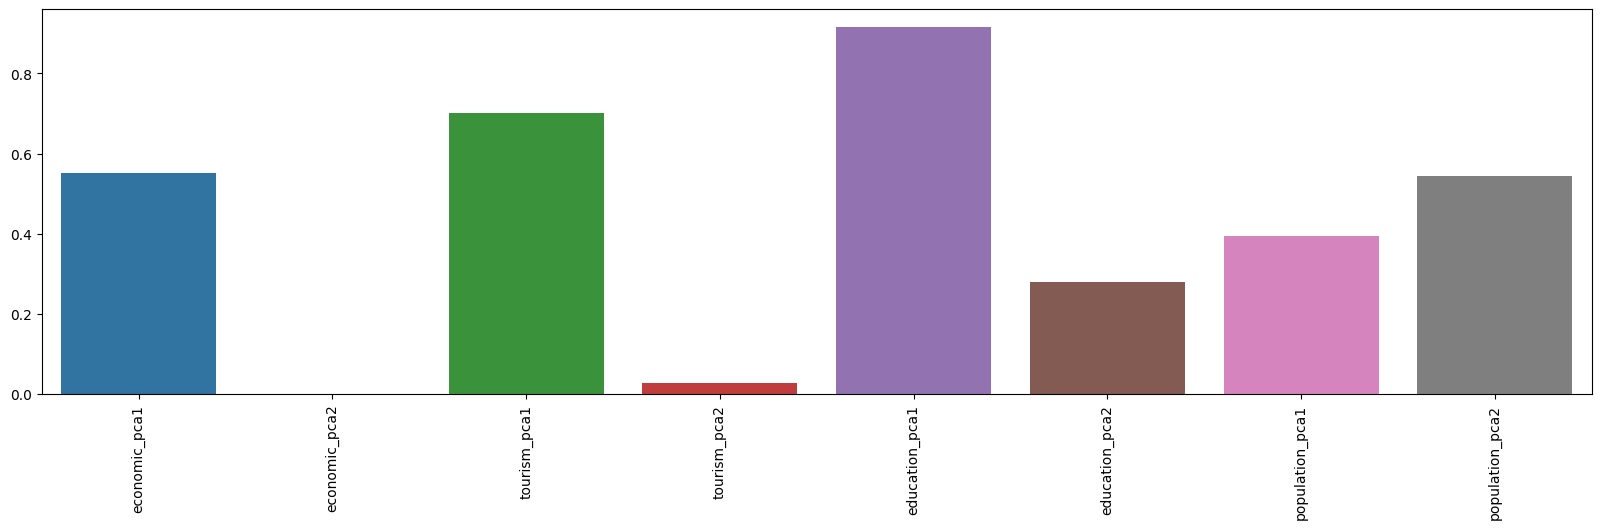

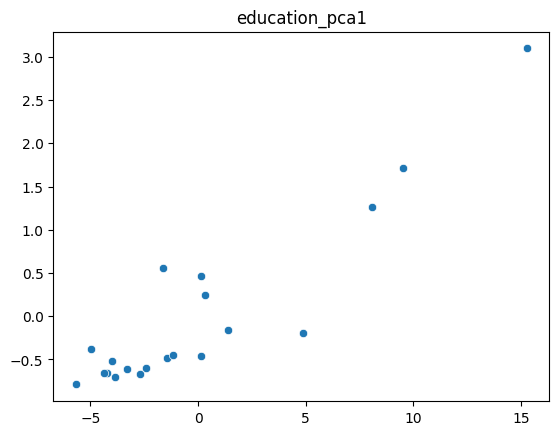

In [27]:
corr_coefs = []
for idx in range(len(categories_cols)):
    corr = np.abs(np.corrcoef(data_pca_X[:, idx], data_y)[0, 1])
    if(pd.isnull(corr)):
        corr = 0
    corr_coefs.append(corr)
print('Coefficients: ', corr_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = categories_cols, y = corr_coefs, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()
sns.scatterplot(x = data_pca_X[:, np.argmax(corr_coefs)], y = data_y)
plt.title(categories_cols[np.argmax(corr_coefs)])
plt.show()

## Training Linear Regression Model

In [28]:
all_idx = np.arange(data_pca_X.shape[0])
np.random.shuffle(all_idx)
train_test_split_idx = int(data_pca_X.shape[0] * 0.8)
train_idx = all_idx[:train_test_split_idx]
test_idx = all_idx[train_test_split_idx:]

In [29]:
model = linear_model.LinearRegression()
model.fit(data_pca_X[train_idx, :], data_y[train_idx])

LinearRegression()

Coefficients:  [ 1.34666817e-01  6.93889390e-17  8.08677349e-03 -2.97750713e-02
  2.10162879e-01 -7.76998519e-02 -2.05787335e-01 -1.69536269e-01]


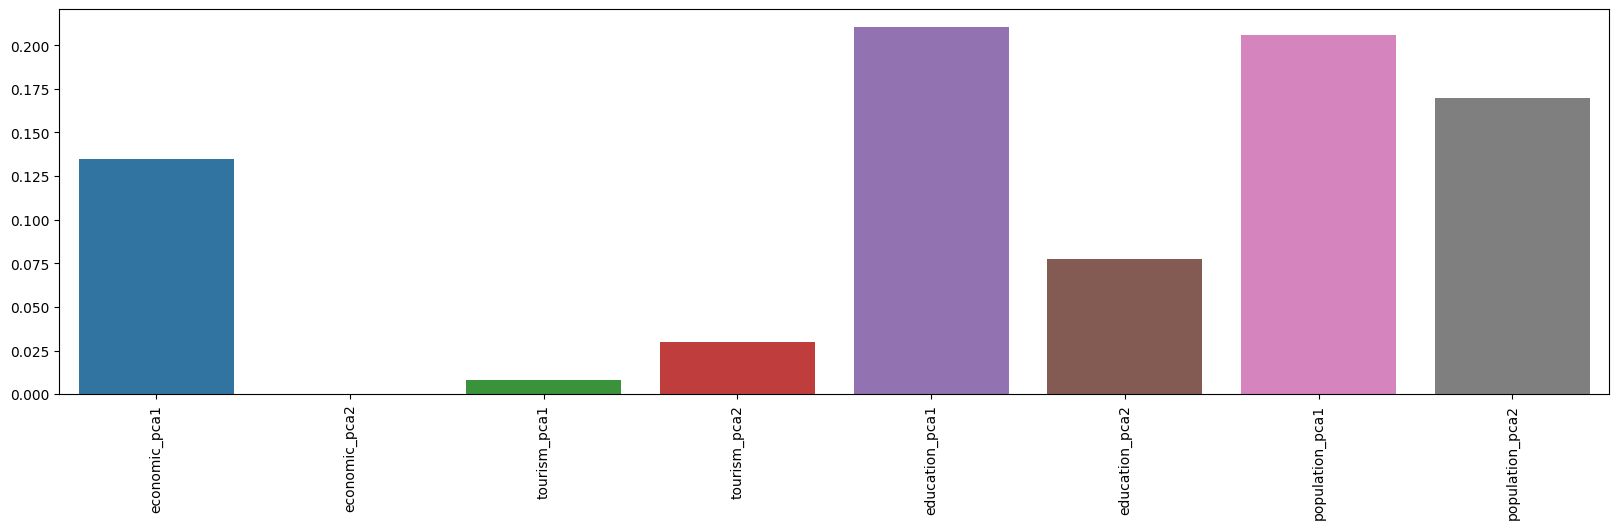

In [30]:
model_coefs = model.coef_
print('Coefficients: ', model_coefs)
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(x = categories_cols, y = np.abs(model_coefs), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

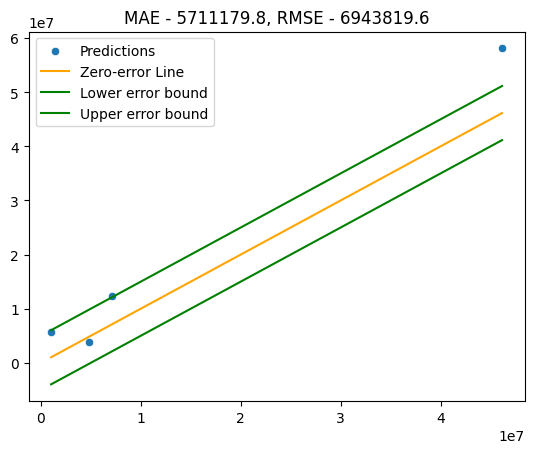

In [31]:
target_mean = cols_standardization_vals[target_feature[0]]['mean']
target_std = cols_standardization_vals[target_feature[0]]['std']
true = data_y[test_idx] * target_std + target_mean
pred = model.predict(data_pca_X[test_idx, :]) * target_std + target_mean
mae = metrics.mean_absolute_error(true, pred)
rmse = np.sqrt(metrics.mean_squared_error(true, pred))
sns.scatterplot(x = true, y = pred, label = 'Predictions')
sns.lineplot(x = true, y = true, label = 'Zero-error Line', color = 'orange')
sns.lineplot(x = true, y = true - 5e6, label = 'Lower error bound', color = 'green')
sns.lineplot(x = true, y = true + 5e6, label = 'Upper error bound', color = 'green')
plt.legend(loc = 'best')
plt.title(f"MAE - {mae:.1f}, RMSE - {rmse:.1f}")
plt.show()

In [32]:
model = linear_model.LinearRegression()
model.fit(data_pca_X, data_y)

LinearRegression()

In [33]:
# To get PCA coefficients
# print([latest_features[x] for x in category_used_cols[1]])
# category_pca[1].components_
# print([latest_features[x] for x in category_used_cols[2]])
# category_pca[2].components_
# print([latest_features[x] for x in category_used_cols[3]])
# category_pca[3].components_

In [34]:
PRESENT_YEAR = 2023
def get_forecasted_values(total_dataset_raw, FORECAST_YEAR = 2033):
    total_dataset = total_dataset_raw.copy()
    history_to_latest_feature_mapping = dict(zip(history_features, ['_'.join(x.split('_history')[0].split('_')[:-1]) + '_latest' for x in history_features if '_'.join(x.split('_history')[0].split('_')[:-1]) + '_latest' in latest_features]))
    growth = np.zeros((total_dataset.shape[0], len(history_features)))
    forecasts = np.zeros((total_dataset.shape[0], len(history_features)))
    for feature_idx, feature in enumerate(history_features):
        for idx, row in total_dataset.iterrows():
            city_history_feature = row[feature]
            city_history_latestyear = row[feature.split('_history')[0] + '_latestyear']
            if(len(city_history_feature) != 0):
                x = np.arange(len(city_history_feature))
                y = np.asarray(city_history_feature) + 1    # To avoid log(0)
                non_na_idx = (pd.isnull(y) == False)
                x = x[non_na_idx]
                y = y[non_na_idx]
                if(len(x) > 1):
                    y = np.log(y)
                    curve_fit = np.polyfit(x, y, 1)
                    growth[idx, feature_idx] = curve_fit[0]
                    if(feature.split('_')[-2] == '1y'):
                        duration = 1
                    elif(feature.split('_')[-2] == '10y'):
                        duration = 10
                    else:
                        print("ALERT: Invalid duration provided!")
                    forecast_idx = (FORECAST_YEAR - PRESENT_YEAR) / duration + len(city_history_feature) - 1
                    forecast = np.exp(curve_fit[0] * forecast_idx + curve_fit[1]) - 1
                    forecasts[idx, feature_idx] = forecast
#                     # For visualizing the growths
#                     if((idx < 2) & (feature_idx % 2 == 0)):
#                         fit_y = np.exp(curve_fit[0] * x + curve_fit[1])
#                         sns.lineplot(x = x, y = np.exp(y) - 1, label = 'Actual')
#                         sns.lineplot(x = x, y = fit_y - 1, label = 'Fit')
#                         sns.scatterplot(x = [forecast_idx], y = forecast, label = 'Forecast')
#                         plt.title(f"{row['City']}_{feature}_{curve_fit}")
#                         plt.legend(loc = 'best')
#                         plt.show()
                else:
                    growth[idx, feature_idx] = np.nan
                    forecasts[idx, feature_idx] = y[0]
            else:
                growth[idx, feature_idx] = np.nan
                forecasts[idx, feature_idx] = row[history_to_latest_feature_mapping[feature]]

    growth_df = pd.DataFrame(growth, columns = ['_'.join(x.split('_history')[0].split('_')[:-1]) + '_growth' for x in history_features])
    growth_df = growth_df.fillna(0)
    forecasts_df = pd.DataFrame(forecasts, columns = ['_'.join(x.split('_history')[0].split('_')[:-1]) + '_forecast' for x in history_features])
    growth_forecasts_df = pd.concat([growth_df, forecasts_df], axis = 1)
    growth_forecasts_df['City'] = total_dataset['City']
    growth_forecasts_df = growth_forecasts_df.reset_index(drop = True)
    total_dataset = pd.merge(total_dataset, growth_forecasts_df, on = 'City')
    
    forecast_features = [x for x in total_dataset.columns if x.endswith('_forecast')]
    non_forecast_col_growths = {
        'NumMonuments_tourism_latest': 0,
        'NumMonumentsChange_tourism_latest': 0,
        'InhabitedVillages_population_latest': 'Population_population',
        'UninhabitedVillages_population_latest': 'Population_population',
        'Towns_population_latest': 'Population_population',
        'Households_population_latest': 'Population_population',
        'Area_population_latest': 0,
        'PopulationPerSqKm_population_latest': 'Population_population',
        'pop2023_population_latest': 'Population_population'
    }
    for col in latest_features:
        if(col.split('_latest')[0] + '_forecast' in forecast_features):
            total_dataset[col + '2'] = total_dataset[col.split('_latest')[0] + '_forecast']
        else:
            assert(col in non_forecast_col_growths)
            if(type(non_forecast_col_growths[col]) == str):
                total_dataset[col + '_growth'] = total_dataset[non_forecast_col_growths[col] + '_growth']
                duration_col = [x for x in total_dataset.columns if (x.startswith(non_forecast_col_growths[col])) & (x.endswith('_history'))]
                assert(len(duration_col) == 1)
                if('1y' in duration_col[0]):
                    duration = 1
                elif('10y' in duration_col[0]):
                    duration = 10
                else:
                    print("ALERT! - Invalid duration found")
                # (y2 + 1) = (y1 + 1) * e ^ ( (x2 - x1) * a )
                total_dataset[col + '2'] = total_dataset.apply(lambda x: (x[col] + 1) * np.exp(x[col + '_growth'] * (FORECAST_YEAR - PRESENT_YEAR) / duration) - 1, axis = 1)
                total_dataset = total_dataset.drop(col + '_growth', axis = 1)
            else:
                total_dataset[col + '2'] = total_dataset[col]
    
    new_total_valid_data = total_dataset[['City'] + [x for x in total_dataset.columns if x.endswith('_latest2')]].copy()
    new_latest_features = [x for x in total_dataset.columns if x.endswith('_latest2')]
    for col_idx, col in enumerate(new_total_valid_data.columns):
        if(col in new_latest_features):
            col_mean = np.nanmean(new_total_valid_data[col].values)
            new_total_valid_data[col] = new_total_valid_data[col].fillna(col_mean)
            col_mean = cols_standardization_vals[col[:-1]]['mean']
            col_std = cols_standardization_vals[col[:-1]]['std']
            new_total_valid_data[col] = (new_total_valid_data[col] - col_mean) / (col_std + 1e-20)
    
    new_data_X = new_total_valid_data[new_latest_features].values
    new_data_pca_X = np.zeros((new_data_X.shape[0], len(categories) * N_COMPONENTS))
    for category_idx, category in enumerate(categories):
        to_use_cols = [x for x in range(new_data_X.shape[1]) if new_latest_features[x].endswith(f"_{category}_latest2")]
        category_data = new_data_X[:, to_use_cols]
        if(category_data.shape[1] <= N_COMPONENTS):
            new_data_pca_X[:, category_idx * N_COMPONENTS: category_idx * N_COMPONENTS + category_data.shape[1]] = category_data
        else:
            pca = category_pca[category_idx]
            category_pca_data = pca.transform(category_data)
            new_data_pca_X[:, category_idx * N_COMPONENTS: (category_idx + 1) * N_COMPONENTS] = category_pca_data
    new_data_pca_X_df = pd.DataFrame(new_data_pca_X, columns = categories_cols)
    new_data_pca_X_df['City'] = pd.Series(new_total_valid_data['City'].values)
    
    target_mean = cols_standardization_vals[target_feature[0]]['mean']
    target_std = cols_standardization_vals[target_feature[0]]['std']
    new_pred_traffic = model.predict(new_data_pca_X) * target_std + target_mean
    new_pred_traffic[new_pred_traffic < 0] = 0
    new_pred_traffic_df = pd.DataFrame.from_dict({'City': new_total_valid_data['City'].values, 'PredictedFutureTraffic': new_pred_traffic}, orient = 'columns')
    
    return new_data_pca_X_df, new_pred_traffic_df, [new_total_valid_data, total_dataset]

In [35]:
FORECAST_YEAR = 2033
shutil.rmtree("./Analysis_Outputs/Forecasted_Features/")
os.mkdir("./Analysis_Outputs/Forecasted_Features/")
for year in range(PRESENT_YEAR, FORECAST_YEAR + 1):
    new_data_pca_X_df, new_pred_traffic_df, debug_info = get_forecasted_values(total_dataset, year)
    if(year != PRESENT_YEAR):
        new_data_pca_X_df.to_csv(f'./Analysis_Outputs/Forecasted_Features/{year}.csv', index = None)
    else:
        present_year_forecasts = new_pred_traffic_df
    if(year == FORECAST_YEAR):
        forecasted_traffic_df =  new_pred_traffic_df

In [36]:
airport_current_traffic_df = pd.merge(airport_traffic_data, present_year_forecasts, on = 'City')
def get_current_traffic(row):
    if(pd.isnull(row['In_Out_Traffic_target'])):
       return row['PredictedFutureTraffic']
    else:
       return row['In_Out_Traffic_target']
airport_current_traffic_df['CurrentTraffic'] = airport_current_traffic_df.apply(get_current_traffic, axis = 1)
airport_current_traffic_df = airport_current_traffic_df[['City', 'CurrentTraffic']]

/tmp/ipykernel_92255/918324080.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


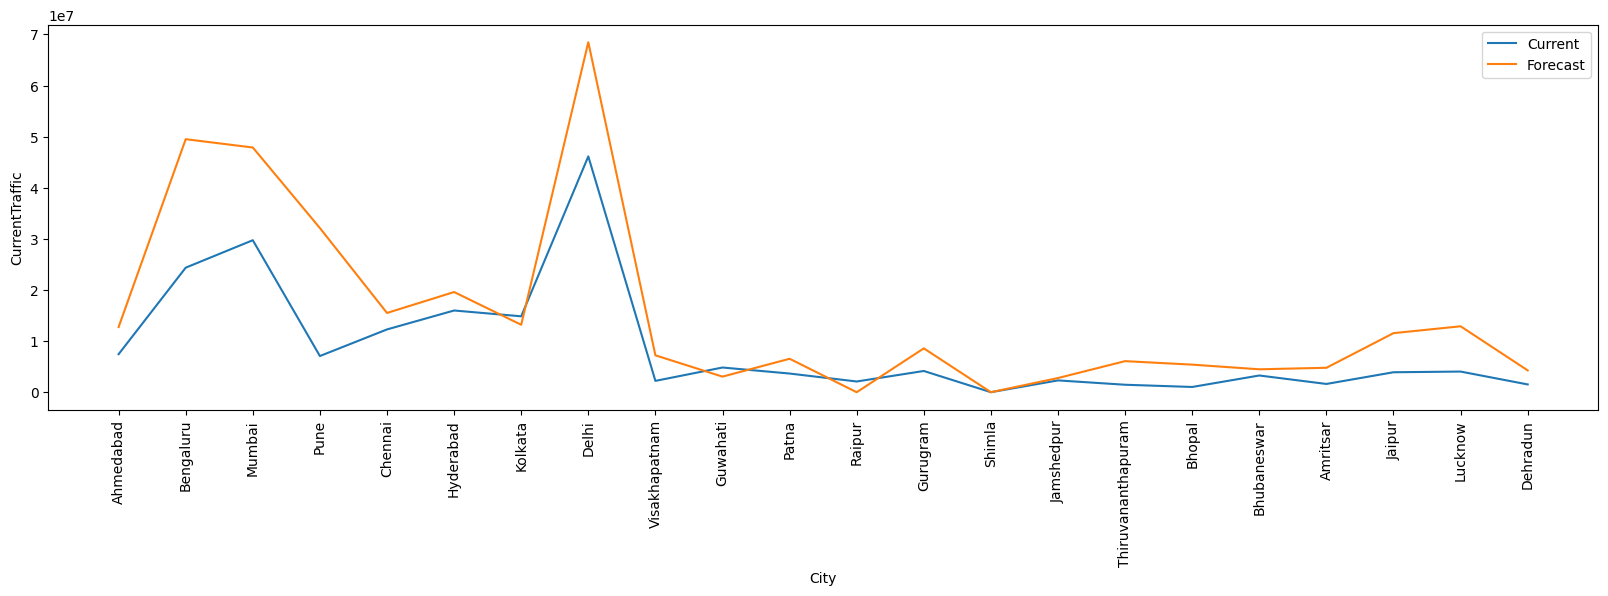

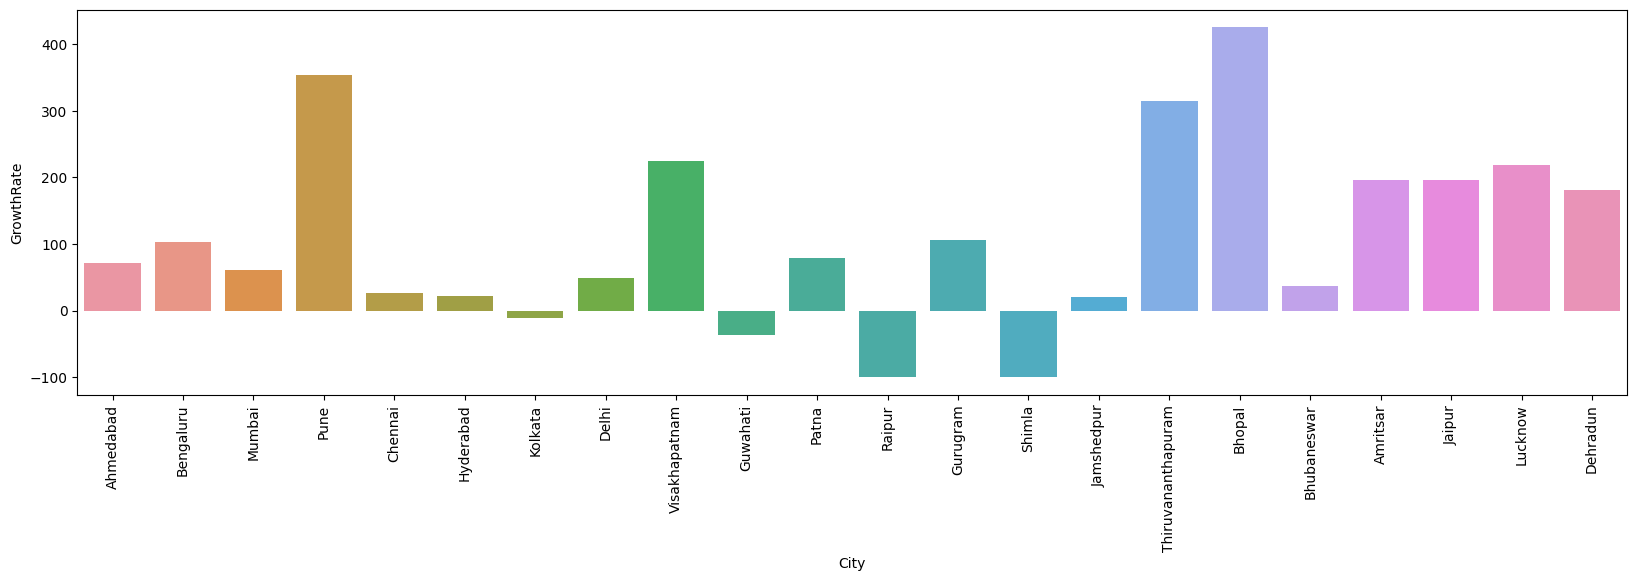

In [37]:
all_traffic_df = pd.merge(airport_current_traffic_df, forecasted_traffic_df, on = 'City')
all_traffic_df['GrowthRate'] = (all_traffic_df['PredictedFutureTraffic'] - all_traffic_df['CurrentTraffic']) / all_traffic_df['CurrentTraffic'] * 100

fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.lineplot(data = all_traffic_df, x = 'City', y = 'CurrentTraffic', label = 'Current', ax = ax)
sns.lineplot(data = all_traffic_df, x = 'City', y = 'PredictedFutureTraffic', label = 'Forecast', ax = ax)
ax.legend(loc = 'best')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.barplot(data = all_traffic_df, x = 'City', y = 'GrowthRate', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [38]:
most_growth_cities = all_traffic_df.sort_values("GrowthRate", ascending = False)
most_growth_cities.to_csv('./Analysis_Outputs/most_growth_cities.csv', index = None)